# Data preprocessing

Building a model to determine whether the employee is leaving the company or not

In [19]:
from pyforest import*
lazy_imports()
%matplotlib inline

In [24]:
dataset =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

<IPython.core.display.Javascript object>

# Data Exploration

In [23]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
dataset.shape

(1470, 35)

In [28]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:
#categorical columns
dataset.select_dtypes(include ='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [32]:
len(dataset.select_dtypes(include ='object').columns)

9

In [33]:
#numerical columns
dataset.select_dtypes(include ='int64').columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [34]:
len(dataset.select_dtypes(include ='int64').columns)

26

In [37]:
#statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Restructuring the dataset

In [40]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#drop these columns(make no sense)
#EmployeeCount, EmployeeNumber, StandardHours, Over18

In [41]:
dataset['EmployeeCount'].nunique()

1

In [44]:
dataset['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [45]:
dataset = dataset.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'])

In [47]:
dataset.shape

(1470, 31)

# Dealing with missing values

In [48]:
dataset.isnull().values.any()

False

In [49]:
dataset.isnull().values.sum()

0

# countplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

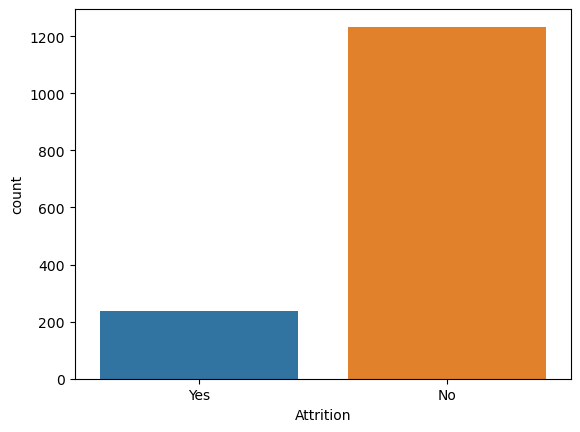

In [50]:
sns.countplot(dataset['Attrition'])
plt.show()

In [52]:
#Employees left the company
(dataset.Attrition == 'Yes').sum()

237

In [53]:
#Employees with the company
(dataset.Attrition == 'No').sum()

1233

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

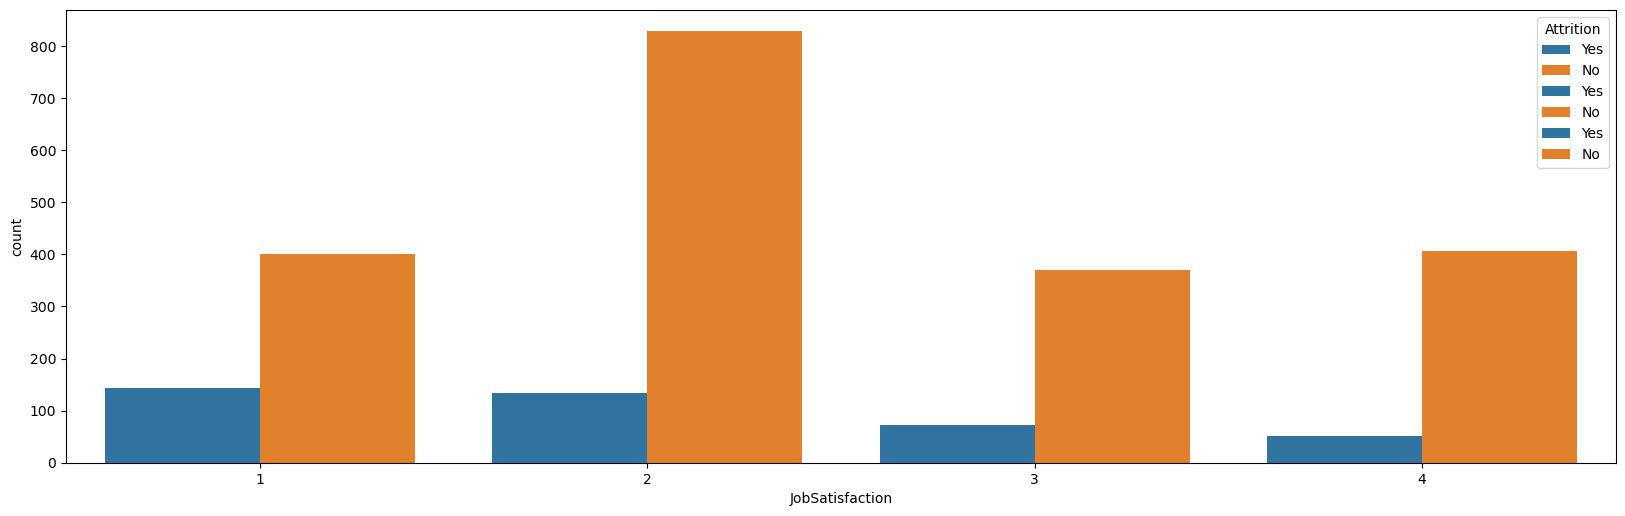

In [55]:
plt.figure(figsize =(20, 20))

plt.subplot(311)
sns.countplot(x ='Department', hue ='Attrition', data =dataset)

plt.subplot(311)
sns.countplot(x ='JobLevel', hue ='Attrition', data =dataset)

plt.subplot(311)
sns.countplot(x ='JobSatisfaction', hue ='Attrition', data =dataset)

In [58]:
#correlation matrix
corr = dataset.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

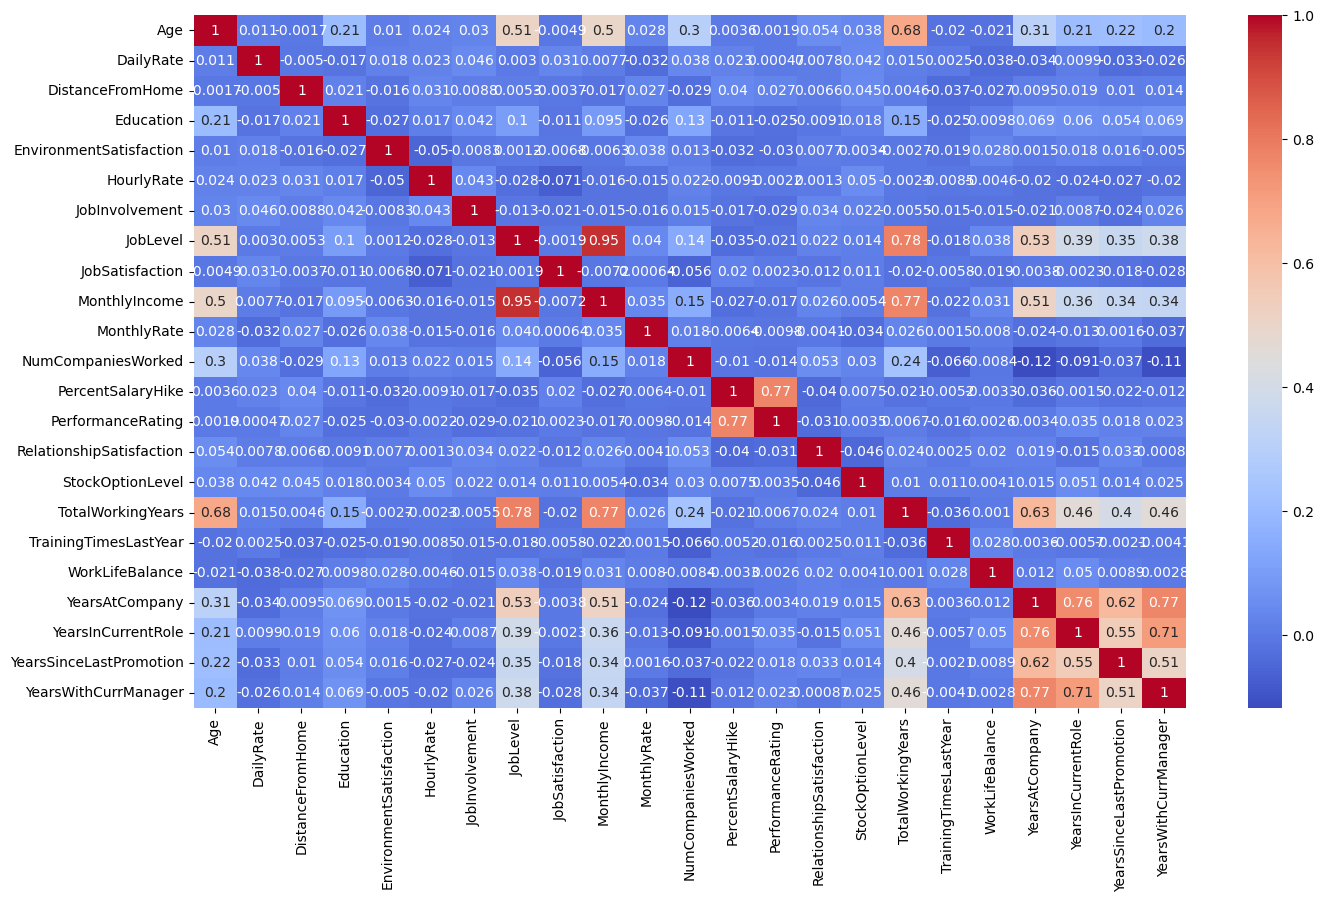

In [61]:
plt.figure(figsize =(16,9))
ax =sns.heatmap(corr, annot =True, cmap='coolwarm')

# Dealing with categorical data

In [62]:
dataset.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [63]:
len(dataset.select_dtypes(include='object').columns)

8

In [64]:
dataset.shape

(1470, 31)

In [66]:
#one hot encoding
dataset =pd.get_dummies(dataset, drop_first=True)

<IPython.core.display.Javascript object>

In [67]:
dataset.shape

(1470, 45)

In [68]:
len(dataset.select_dtypes(include='object').columns)


0

In [87]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [94]:
#renameing the target variable
dataset.rename(columns ={'Attrition_Yes': 'Attrition'}, inplace =True)


In [96]:
dataset.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

# Splitting the dataset

In [99]:
#matrix of features
x =dataset.drop(columns ='Attrition')

In [100]:
#target variable
y =dataset['Attrition']

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.2, random_state=0)

In [102]:
x_train.shape

(1176, 44)

In [104]:
x_test.shape

(294, 44)

# Feature scaling

In [106]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [107]:
x_train

array([[ 2.3389367 , -0.48557354,  1.45567735, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.9043263 ,  0.36465323,  2.31628752, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.23722329,  2.0703989 , ...,  1.11547067,
        -0.69900472, -0.61535643],
       ...,
       [ 0.68361701,  0.92900666, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377, -1.31608491, -0.88026453, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.35255307, -0.35495899,  0.10328995, ..., -0.89648256,
        -0.69900472, -0.61535643]])

In [108]:
x_test

array([[-0.08886552, -0.41164077,  0.10328995, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.41992946, -0.5595063 ,  1.94745459, ..., -0.89648256,
         1.43060551, -0.61535643],
       [-0.19922017, -0.34510129,  1.08684442, ...,  1.11547067,
        -0.69900472,  1.62507442],
       ...,
       [-0.64063875, -1.36290899, -0.38848729, ...,  1.11547067,
        -0.69900472,  1.62507442],
       [ 0.13184377,  1.13108954, -0.88026453, ...,  1.11547067,
        -0.69900472, -0.61535643],
       [ 0.35255307, -1.06717794, -0.14259867, ...,  1.11547067,
        -0.69900472,  1.62507442]])

# Building the model

# Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state =1)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [110]:
y_pred =classifier_lr.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [113]:
acc =accuracy_score(y_test, y_pred)
acc

0.8843537414965986

In [114]:
cm =confusion_matrix(y_test, y_pred)

In [115]:
cm

array([[237,   8],
       [ 26,  23]], dtype=int64)

# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf =RandomForestClassifier(random_state =1)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [118]:
y_pred =classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
acc =accuracy_score(y_test, y_pred)
acc

0.8367346938775511

In [120]:
cm =confusion_matrix(y_test, y_pred)

In [121]:
cm

array([[242,   3],
       [ 45,   4]], dtype=int64)

# Support Vector machine

In [122]:
from sklearn.svm import SVC
classifier_svc =SVC(random_state =1)
classifier_svc.fit(x_train, y_train)


SVC(random_state=1)

In [123]:
y_pred =classifier_svc.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [124]:
acc =accuracy_score(y_test, y_pred)
acc

0.8673469387755102